# Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Reading & exploring the data-set

In [2]:
df = pd.read_csv('diabetes.csv')
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### This data-set is to predict weather a person has a diabetes or not based on  some medical measurements that affects on having a diabetes like Glucose,Insulin,BMI .. etc . 

### The data-set contains 768 row and 9 columns (features)


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 1.Variable Data Types

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### All data types of the data-frame are numeric (float or integer)

# 2. Columns names

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# 3. Check for Missing Values 

In [138]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### No missing values in this data set but there's many data-point that has zero value which is consider as a bad data and needs imputing the same as missing data 

In [6]:
df.replace('?',np.nan,inplace=True)

# Exclude  the target and the columns that is possible to have zero values 
# and replace the zero values with null to avoid considering it as an outlier

df.loc[:, ~df.columns.isin(['Outcome', 'Pregnancies'])] = df.replace(0,np.nan) 
df2 = df.copy()
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# 4. Check for Bad Data 

### bad data may include :
* outliers
* duplicates
* illegel values

In [141]:
df.duplicated().sum()

0

In [8]:
def find_upper_and_lower_fence(dataset,feature):
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    return [lower_fence,upper_fence]


In [9]:
def find_outliers(df,feature,func):
    lower,upper = func(df,feature)
    outliers =  df[ (df[feature] < lower ) | (df[feature] > upper) ]
    print("{:30}{}".format(feature,outliers.shape[0]))

find_outliers(df,'Glucose',find_upper_and_lower_fence)

Glucose                       0


### By knowing the number of outliers in our data frame, we can start to figure out which imputation method is better than the other

### E.g : avoid using the mean with columns that have many outliers .. or vice versa

In [10]:
print('Feature name\t\tNumber of outliers\n')
for i in df.columns:
    find_outliers(df,i,find_upper_and_lower_fence)

Feature name		Number of outliers

Pregnancies                   4
Glucose                       0
BloodPressure                 14
SkinThickness                 3
Insulin                       24
BMI                           8
DiabetesPedigreeFunction      29
Age                           9
Outcome                       0


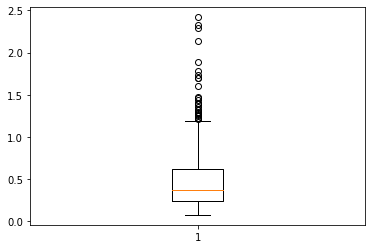

In [11]:
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.show()

In [12]:
df.isnull().sum()[:-1]

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [12]:
# drop rows with the least number of null values
df.dropna(subset=['Glucose'],inplace=True)
df['Glucose'].isna().sum()

0

# 5. Imputation 

In [13]:
# use the mean for imputation in the column with least number of outliers 

df.loc[df['SkinThickness'].isnull()] = df['SkinThickness'].mean()

In [14]:
# use the median in the columns with more number of outliers

df.loc[df['BloodPressure'].isnull()] = df['BloodPressure'].median()
df.loc[df['Insulin'].isnull()] = df['Insulin'].median()

In [15]:
import random 
# By using the randint method, we can generate random integer to impute the missing value 
# the start and end is within the normal range of a specific column

df.loc[df['BMI'].isnull()] = random.randint(17,30)

In [16]:
# Check if there's still zero values after imputing
df.isna().sum()[:-1]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# Alternative and better way for imputation

In [88]:
# Using KNN imputer to fill null values instead of mean/median/mode

from sklearn.impute import KNNImputer

df_knn = df2.copy()
knn_imputer=KNNImputer(n_neighbors=5)

df_knn.iloc[:]=knn_imputer.fit_transform(df_knn)
df_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### KNN Imputer use KNN model to fill the missing values using the mean value from n_neighbors nearest neighbors found in each column.

In [89]:
df_knn.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 6. Scaling the data (needed?)

### To know weather a specific column needs a scalling or not , we should first see the minimum and maximum values of each column

In [14]:
print("{:41}{:33}{}".format("Feature Name","Min","Max"),'\n')
for i in df_knn.columns:
    print('{:30}{:13}{:33}'.format(i, int( (df_knn[i].min()) ) ,int( (df_knn[i].max()))) )

Feature Name                             Min                              Max 

Pregnancies                               0                               17
Glucose                                  44                              199
BloodPressure                            24                              122
SkinThickness                             7                               99
Insulin                                  14                              846
BMI                                      18                               67
DiabetesPedigreeFunction                  0                                2
Age                                      21                               81
Outcome                                   0                                1


In [15]:
int( (df_knn['Insulin'].min()) ) ,int( (df_knn['Insulin'].max())) 

(14, 846)

### almost each feature has a high differance between the min and max values , So we have to scale our data-set

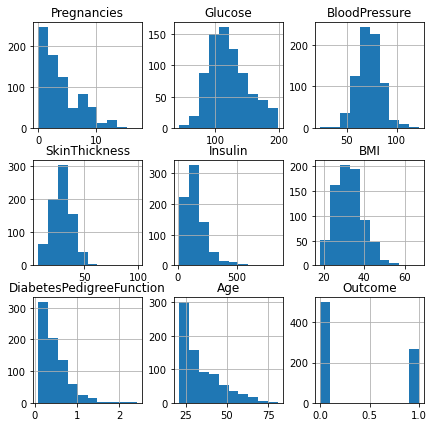

In [21]:
# Plot the data befor scalling
df_knn.hist(figsize=(7,7))
plt.show()

In [16]:
norm_scale = MinMaxScaler().fit_transform(df_knn)
scaled_frame = pd.DataFrame(norm_scale,columns=df_knn.columns)
scaled_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.186298,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.053606,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.204348,0.181010,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


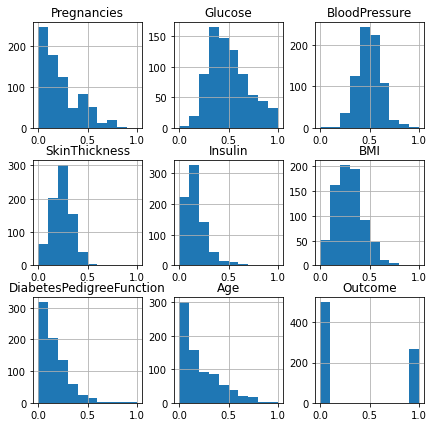

In [23]:
# Plot the data after scalling 
scaled_frame.hist(figsize=(7,7))
plt.show()

In [17]:
df_knn = scaled_frame.copy()

### Notice that the distribution of the data set stays the same after scalling , we've just change the range or the difference between the data points to be between 0-1 by using Min-Max scalling

# 8.Remove outliers

In [18]:
df_knn.shape

(768, 9)

In [19]:
for i in df_knn.columns:
    lower,upper = find_upper_and_lower_fence(df_knn,i)
    df_knn = df_knn[~((df_knn[i] < lower) | (df_knn[i] > upper ))]
df_knn.shape

(662, 9)

# 9.Check for data Imbalance (Target variable: Outcome)

In [258]:
df_knn['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

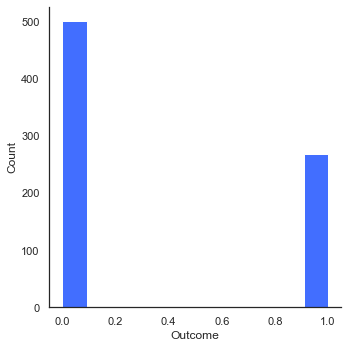

In [259]:
sns.set_theme(style="white",palette="bright")
sns.displot(df['Outcome'])
plt.show()

### As the figure shows, the data-set has more people without carrying of the diabetes which makes the data imbalanced .. Imbalance data could effect the ML model to be biased towards the more frequent result

### This issue could be solved by either oversampling the less frequent samples (diabetes carriers) or undersampling the more frequent samples

# Handling imbalance dataset 
## Using imbalanced-learn library 

In [3]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: E:\ana

  added / updated specs:
    - imbalanced-learn


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.13.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


## Oversampling 

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
X = df_knn.drop('Outcome',axis=1)
y = df_knn['Outcome']
X.shape , y.shape

((662, 8), (662,))

In [31]:
ros = RandomOverSampler(sampling_strategy="not majority") 

X, y = ros.fit_resample(X, y)
X.shape , y.shape

((908, 8), (908,))

In [257]:
y.value_counts()

1.0    454
0.0    454
Name: Outcome, dtype: int64

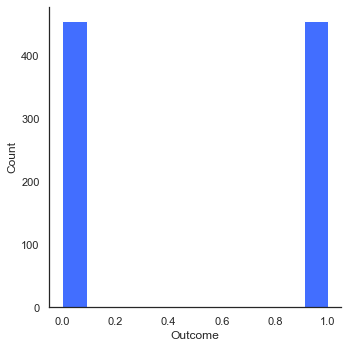

In [86]:
sns.set_theme(style="white",palette="bright")
sns.displot(y)
plt.show()

# 10. Which independent variable has the highest correlation with outcome?

In [89]:
df_knn.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [90]:
c = {}
for i in df_knn.columns[:-1]:
    c[i] = df_knn[i].corr(df_knn['Outcome'])
    
[print("{:30}{}".format(k,v)) for k,v in c.items()]

print(f'\nHighest correlation coeffeint with the target = {max(c.values())} for the {max(c,key=c.get)} column')

Pregnancies                   0.23884511920235546
Glucose                       0.4937917431105724
BloodPressure                 0.18365416130688197
SkinThickness                 0.26546437648813187
Insulin                       0.35627756903028673
BMI                           0.277131711896035
DiabetesPedigreeFunction      0.1683260824820096
Age                           0.2876873783490705

Highest correlation coeffeint with the target = 0.4937917431105724 for the Glucose column


In [91]:
# Plot the Correlation matrix 
corr = df_knn.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.136447,0.204104,0.154563,0.120742,0.045107,-0.003451,0.580161,0.238845
Glucose,0.136447,1.000000,0.242909,0.196750,0.642577,0.209416,0.067928,0.278021,0.493792
BloodPressure,0.204104,0.242909,1.000000,0.232342,0.187592,0.273480,0.042823,0.371648,0.183654
SkinThickness,0.154563,0.196750,0.232342,1.000000,0.259713,0.659363,0.088658,0.184856,0.265464
Insulin,0.120742,0.642577,0.187592,0.259713,1.000000,0.285416,0.101592,0.304004,0.356278
BMI,0.045107,0.209416,0.273480,0.659363,0.285416,1.000000,0.153893,0.107619,0.277132
DiabetesPedigreeFunction,-0.003451,0.067928,0.042823,0.088658,0.101592,0.153893,1.000000,0.064887,0.168326
Age,0.580161,0.278021,0.371648,0.184856,0.304004,0.107619,0.064887,1.000000,0.287687
Outcome,0.238845,0.493792,0.183654,0.265464,0.356278,0.277132,0.168326,0.287687,1.000000


# Choosing a model for classification

In [260]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [261]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train data size : {X_train.shape}\nTest data size : {X_test.shape}\nof a total data size: {X_train.shape[0]+X_test.shape[0]}")

Train data size : (726, 8)
Test data size : (182, 8)
of a total data size: 908


In [262]:
models = []
accurecy = []
error = []

In [263]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
models.append(tree)

In [264]:
from sklearn.svm import SVC
svc = SVC()
models.append(svc)

In [265]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
models.append(knn)

In [266]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
models.append(rfc)

In [267]:
from sklearn import metrics

In [268]:
for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accurecy.append(acc)
    error.append(metrics.mean_squared_error(y_test,y_pred))
    
result_df = pd.DataFrame({ "Model":['Decision Tree','SVC','KNN','Random Forest'],"Accurecy":accurecy,"Mean squared error":error })
result_df

,Model,Accurecy,Mean squared error
0,Decision Tree,0.829670,0.170330
1,SVC,0.802198,0.197802
2,KNN,0.813187,0.186813
3,Random Forest,0.901099,0.098901


In [269]:
# Select the best model
result_df.loc[(result_df['Accurecy']==result_df['Accurecy'].max()) & 
              (result_df['Mean squared error']==result_df['Mean squared error'].min()) 
             ]

,Model,Accurecy,Mean squared error
3,Random Forest,0.901099,0.098901
